In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats

res_seed = 10

In [2]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


vectorDim = 100

numNode = 1000



Using Numpy backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PeterDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [4]:
#reservoirStatesBuffer[:,:resn]

in_small = np.load('in_small.npy')
out_small = np.load('in_small.npy')

print(len(in_small))
print(len(out_small))



10000
10000


In [5]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')



In [6]:
# here we read the text, run the reservoir - will do this twice for intact and scrambled

#read in the narrative

huge_list = []

#with open("my_file_Gatsby_Kane_wolfe_bond.txt", "r") as f:
#    huge_list = f.read().split()::::"iss_gatsby_long.txt"
with open("not-the-fall.txt", "r", encoding="utf8") as f:
    huge_list = f.read().split()


#print(huge_list)   

discourse_words = huge_list

# clean it up
# large capital -> small capital

discourse_words = [s.replace(s, s.lower()) for s in discourse_words]

    # remove '.' and ',' from word list
discourse_words = [s.replace('.', '') for s in discourse_words]
discourse_words = [s.replace(',', '') for s in discourse_words]

    # remove stop words from word list
stop_words = stopwords.words('english')
    #print(stop_words)
for stop_word in stop_words:
    while stop_word in discourse_words :
        discourse_words.remove(stop_word)
            
            
    # remove "'s" and "'" and "-" and "'d" and "'ll" and "'ve" and "re" from word list
discourse_words = [s.replace("'s", '') for s in discourse_words]
discourse_words = [s.replace("'", '') for s in discourse_words]
discourse_words = [s.replace("-", ' ') for s in discourse_words]
discourse_words = [s.replace("'d", '') for s in discourse_words]
discourse_words = [s.replace("'ll", '') for s in discourse_words]
discourse_words = [s.replace("'ve", '') for s in discourse_words]
discourse_words = [s.replace("'re", '') for s in discourse_words]
discourse_words = [s.replace("'m", '') for s in discourse_words]
discourse_words = [s.replace("(", '') for s in discourse_words]
discourse_words = [s.replace(")", '') for s in discourse_words]
discourse_words = [s.replace("[", '') for s in discourse_words]
discourse_words = [s.replace("]", '') for s in discourse_words]
discourse_words = [s.replace(",", '') for s in discourse_words]
discourse_words = [s.replace(";", '') for s in discourse_words]
discourse_words = [s.replace("-", '') for s in discourse_words]
discourse_words = [s.replace(":", '') for s in discourse_words]
discourse_words = [s.replace("?", '') for s in discourse_words]
discourse_words = [s.replace("!", '') for s in discourse_words]



#print(discourse_words)

inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)

for num in range(len(discourse_words)):
    inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
    print(discourse_words[num], num, end = ' ')
print(inputDataTesting.shape)

# set the seed
np.random.seed(res_seed)



(0, 100)
five 0 thousand 1 feet 2 albany 3 perfect 4 day 5 beautiful 6 blue 7 sky 8 cloud 9 sky 10 see 11 horizon 12 every 13 direction 14 uh 15 girl 16 pushed 17 airplane 18 screams 19 wait 20 wait 21 chute 22 gone 23 plane 24 think 25 sentence 26 ends 27 know 28 functioning 29 properly 30 great 31 jump 32 think 33 ends 34 worse 35 know 36 lot 37 skydiving 38 would 39 think 40 know 41 working 42 chute 43 lends 44 better 45 better 46 jump 47 especially 48 towards 49 end 50 happened 51 forties 52 suddenly 53 surprisingly 54 want 55 one 56 kind 57 uh 58 midlife 59 crisis 60 guys 61 runs 62 gets 63 convertible 64 besides 65 needs 66 two 67 convertibles 68 know 69 already 70 gotten 71 divorced 72 already 73 checked 74 uh 75 needed 76 something 77 went 78 like 79 cliche 80 n 81 ber 82 three 83 drive 84 upstate 85 skydiving 86 academy 87 uh 88 near 89 albany 90 meeting 91 meeting 92 annette 93 school 94 bare 95 bellied 96 khaki 97 shorted 98 know 99 tan 100 shouldered 101 senior 102 instruct

In [7]:
# here we create an input vector that is mainly zeros, and has a few values, to "ping" the reservoir
#start with just one

inputImpulseTesting = np.zeros((1500,vectorDim))

for i in range(400):
    #inputImpulseTesting[i] = inputDataTesting[110]
    inputImpulseTesting[i+500] = inputDataTesting[200]


# set the seed
np.random.seed(res_seed)

# set up the reservoir
# leakingRate=0.2 changing too fast, mutliple with 0.05; changed
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.15, regressionParameters=[1e-2], solver="lsqr", feedback=False)

# train the reervoir with a new seed
esn.fit(in_small, out_small, transientTime="Auto", verbose=1)

#run the reservoir
reservoirStatesBuffer = np.empty((0,numNode))
prediction,reservoirStatesBuffer  = esn.predict(inputImpulseTesting)
reservoirStatesBuffer = reservoirStatesBuffer.T
print(reservoirStatesBuffer.shape)
reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
print(reservoirStatesBuffer.shape)
print(prediction.shape)

# set the similarity matrix
sim_matrix1 = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])
       
print(len(reservoirStatesBuffer[1]))





100% (9861 of 9861) |####################| Elapsed Time: 0:00:05 Time:  0:00:05


(1500, 1101)
(1500, 1000)
(1500, 100)
1000


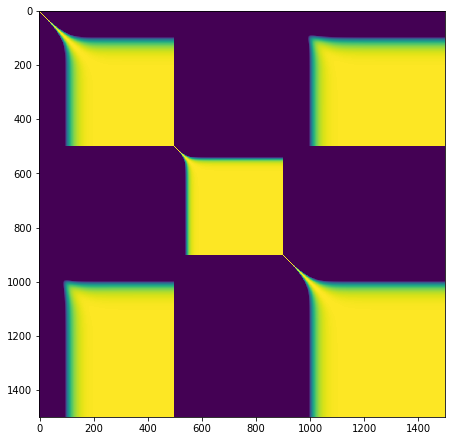

In [8]:

scale = 0.999

fig= plt.figure(figsize=(16,10))

plt.subplot(122)
#plt.imshow(np.corrcoef(sim_matrix1[280:680,280:680]))
plt.imshow(np.corrcoef(reservoirStatesBuffer), vmin=scale, vmax=1)







plt.savefig('reservoir-ping.png', dpi=600)

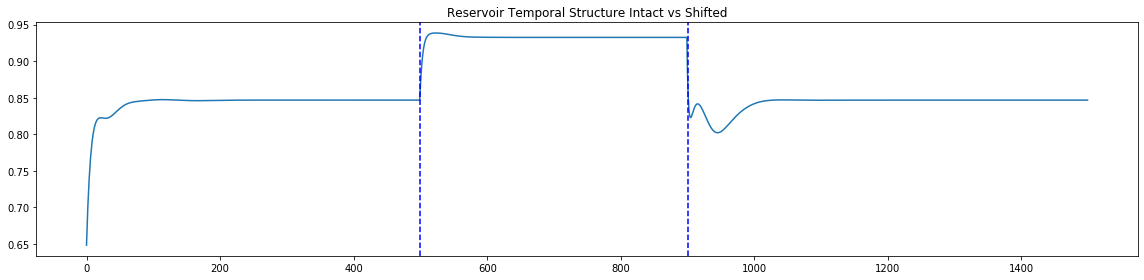

In [9]:
resn = 100
begin=0
end=1500
fig= plt.figure(figsize=(16,4))

plt.plot( reservoirStatesBuffer[begin:end,4:5] )
plt.title('Reservoir Temporal Structure Intact vs Shifted')
#plt.axvline(x=299, color='b', linestyle='--')
#plt.axvline(x=300, color='b', linestyle='--')
plt.axvline(x=500, color='b', linestyle='--')
plt.axvline(x=900, color='b', linestyle='--')


fig.tight_layout()

#plt.savefig('reservoirstates--not-the-fall-differences1.png')

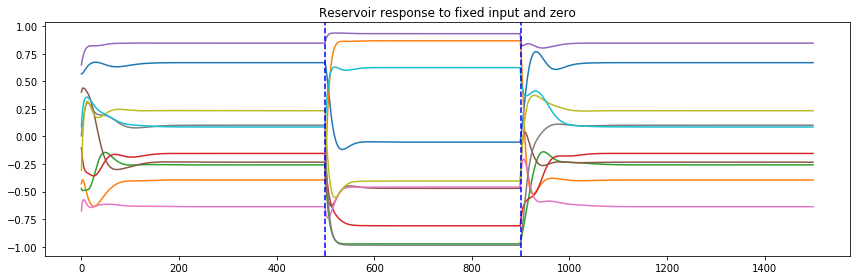

In [10]:
resn = 10

fig= plt.figure(figsize=(12,4))

plt.plot( reservoirStatesBuffer[:,:resn] )
plt.title('Reservoir response to fixed input and zero')
#plt.axvline(x=299, color='b', linestyle='--')
#plt.axvline(x=300, color='b', linestyle='--')
plt.axvline(x=500, color='b', linestyle='--')
plt.axvline(x=900, color='b', linestyle='--')


fig.tight_layout()

plt.savefig('reservoirstates-IMPULSE-1.png')

In [11]:
# prepare data for calculating time contant based on ping
resn = numNode
index = 0
begin=500
end=700
data = reservoirStatesBuffer[begin:end,index:index+resn]
print(data.shape)
dataT=data.T
print(dataT.shape)
print(dataT.shape[0])
print(dataT.shape[1])

(200, 1000)
(1000, 200)
1000
200


In [12]:
#since the neurons do not all  stablize at zero, need to shift related to their final stable value
shiftedData = dataT
print(dataT.shape)
for neuron in range(dataT.shape[0]):
        for timestep in range(dataT.shape[1]):
            shiftedData[neuron,timestep] = dataT[neuron,timestep] - dataT[neuron,dataT.shape[1]-1]
            


(1000, 200)


In [13]:
timeconstants = np.zeros(shiftedData.shape[0])
res_maxes = np.zeros(shiftedData.shape[0])

#calculate the alignment time:  shiftedData(neurons,time)
#interate over reservoir neuron
for neuron in range(shiftedData.shape[0]):
    # get the value
    max = abs(shiftedData[neuron,0])
    if max > -1:  #WAS 0.05
        for timestep in range(shiftedData.shape[1]):
            if (abs(shiftedData[neuron,timestep]) < max/2):
                timeconstants[neuron] = timestep
                res_maxes[neuron] = max
                max=-1     
                
print(timeconstants)
print(len(timeconstants))
print(res_maxes)

[  9.   6.   6.   7.   3.   2.  23.   5.   4.   5.   5.   5.   5.  20.
  18.   5.   3.  16.   3.   5.  11.  23.  20.   5.   4.   5.   3.   3.
   7.  27.   5.   2.  12.   4.   8.  17.   6.  10.   5.   3.  23.  13.
   3.   5.   6.   1.   3.   9.  10.   5.  11.   5.   4.   5.   4.   5.
   5.  15.  37.   6.   4.   9.   7.   8.   5.   4.  16.   9.   3.   6.
   5.   2.   2.   3.  10.   9.  13.   5.   3.  25.  37.   5.   6.  10.
   4.   3.  24.  40.   5.  30.   5.   9.  12.   8.   7.  33.   2.   5.
   1.  25.   5.   6.   5.  29.   5.  42.   8.   4.  19.   8.   5.  33.
   2.   5.  17.   1.   3.   5.   4.   5.   6.   5.   5.   4.  42.  14.
   6.   5.  14.   6.   6.   9.   3.   7.  12.   5.   4.   4.   5.   5.
  31.   6.   5.   4.  17.   4.   5.   2.   3.  10.   1.  13.   5.   6.
   5.  12.   5.  29.   1.  15.   8.  10.  20.   5.  51.   4.   5.  13.
   5.   5.   2.  10.   4.  11.  13.   5.  18.  17.   5.   4.  10.   5.
   1.   5.   8.  15.  23.   5.   5.   6.   4.   3.   6.   2.  12.   6.
  63. 

In [14]:
save_timeconstants = timeconstants
timeconstants = np.sort(save_timeconstants)

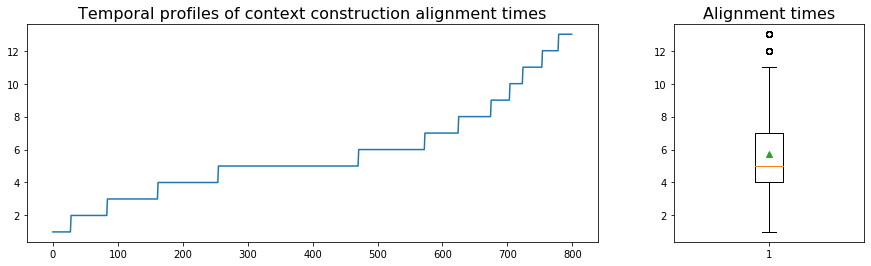

In [15]:
fig= plt.figure(figsize=(15,4))
#488
begin = 0  #166
end = 800    #468
gs = gridspec.GridSpec(1, 2,width_ratios=[3,1])
plt.subplot(gs[0])
plt.plot(timeconstants[begin:end])
#plt.axhline(y=13, color='b', linestyle='--')

plt.title('Temporal profiles of context construction alignment times', fontsize=16)


ax = fig.add_subplot(gs[1])
bp = ax.boxplot(timeconstants[begin:end], showmeans=True)
#plt.hist(timeconstants[begin:end], bins = 10)

plt.title('Alignment times', fontsize=16)
#plt.axhline(y=13, color='b', linestyle='--')

plt.savefig('not-the-fall-impulse-900-1100.png', dpi=600)

In [17]:
reservoirStatesBuffer1 = reservoirStatesBuffer
print(reservoirStatesBuffer1.shape)
#that is (timesteps, neuron)
timesteps = reservoirStatesBuffer1.shape[0]
neurons = reservoirStatesBuffer1.shape[1]
print(timesteps)
print(neurons)
print(len(timeconstants))

(1500, 1000)
1500
1000
1000


In [18]:
# add a column to store the time constants into the 

reservoirStates1SortedT = np.zeros((neurons,timesteps+1))
reservoirStates1SortedT[:,:-1] = reservoirStatesBuffer1.T

In [19]:
reservoirStates1SortedT[:,682]=save_timeconstants

In [20]:
SortedStates = reservoirStates1SortedT[np.argsort(reservoirStates1SortedT[:, 682])]

In [21]:
# now we can create the pattern correlation matrices for different time-constant plages
print(SortedStates.shape)
SortedStatesT=SortedStates.T
print(SortedStatesT.shape)
print(SortedStatesT[:,400:450].shape)

(1000, 1501)
(1501, 1000)
(1501, 50)


In [22]:
# now we can create the pattern correlation matrices for different time-constant plages
print(SortedStates.shape)
SortedStatesT=SortedStates.T
print(SortedStatesT.shape)
print(SortedStatesT[:,400:450].shape)

(1000, 1501)
(1501, 1000)
(1501, 50)


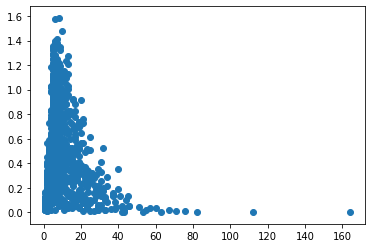

In [23]:
plt.scatter(save_timeconstants,res_maxes)

plt.show()